##### A) Hrátky s čísly
1.Které z přirozených čísel menších než 10000 má nejvíce dělitelů? Je odpověď na tuto
otázku jednoznačná?

In [23]:
def one():
    maxcount = 0
    maxnum = 0
    for i in range(1,10001):
        count = 0
        for j in range(1,i+1):
            if i % j == 0:
                count = count + 1
        if maxcount <= count:
            maxcount = count
            maxnum = i
    print("number ", maxnum, " has ", maxcount, " dividers")
            
one()

number  9240  has  64  dividers


3.Collatzova posloupnost je definována následovně: „vezmi přirozené číslo, pokud je
sudé, vyděl jej dvěma, pokud je liché, vynásob jej třemi a přičti jedničku; tento
postup opakuj, dokud nedostaneš číslo jednaÿ. Například pro číslo 27 potřebujeme
111 kroků, než se dostaneme na číslo 1. Pro které číslo menší než 10000 potřebujeme
nejvíce kroků?

In [25]:
def collatz():
    maxsteps = 0
    maxnum = 0
    for i in range(1,10001):
        steps = 0
        num = i
        while num != 1:
            if num % 2 == 1:
                num = num * 3 + 1
            else:
                num = num / 2
            steps = steps + 1
        if steps >= maxsteps:
            maxsteps = steps
            maxnum = i
    print(maxnum, " needs ", maxsteps)
            
collatz()

6171  needs  261


4.Jaký je součet všech prvočísel, která jsou menší než 1000 a neobsahují žádnou trojku?

In [26]:
def isprime(p):
    if p == 1:
        return False
    for i in range(2,p):
        if p % i == 0:
            return False
    return True

def includes(p):
    
    while p > 0:
        if p % 10 == 3:
            return True
        p = p // 10
    return False

def primes():
    primesum = 0
    for i in range(1,1001):
        if isprime(i):
            if includes(i) != True:
                primesum = primesum + i
                #print(i)
    print(primesum)
    
primes()

49061


5.Uvažme posloupnost, která začíná dvěmi jedničkami a každý další člen je součtem
dvou předchozích navýšený o jejich největšího společného dělitele. Posloupnost tedy
začíná: 1, 1, 3, 5, 9, 15, 27, 45, 81, 135, 243, 405. Jaká je hodnota prvního prvku
této posloupnosti, který je větší než milion?


In [27]:
def nsd(a,b):
    if b == 0:
        return a
    else:
        return nsd(b, a % b)

def last():
    i = 1
    j = 1
    while i < 1000000:
        tmp = i
        i = i + j + nsd(i,j)
        j = tmp
    print(i)
    
last()

1594323


##### B) Práce s grafikou
Vytvořte si vlastní „knihovnuÿ (případně najděte vhodnou existující) pro snadnou práci
s vektorovou i bitmapovou grafikou.
Práci s bitmapovou grafikou otestujte vytvořením následujícího obrázku:

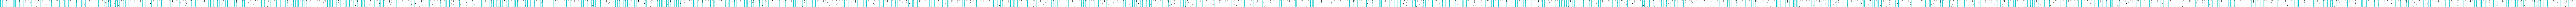

In [40]:
from PIL import Image
from IPython.display import display

#size: size of image (up to 255)
#n: third color
def bit_map(size = 255, n = 100):
    if size > 255:
        size = 255
    image = Image.new("RGB", (100000, size))
    for i in range(1,size):
        for j in range(1,100000):
            if(j%i==0):
                image.putpixel((j,i), (0,0,0))
            else:
                image.putpixel((j,i), (255,255,255))
    #image.show()
    checkForPrimes(image)
    image.save("bitmap.bmp")
    display(image)

def checkForPrimes(image):
    for i in range(2,100000):
        if(isPrime(i)):
            for j in range(1,255):
                if(image.getpixel((i,j)) == 0,0,0):
                    image.putpixel((i,j),(0,200,200))
            
            
def isPrime(n):
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            return False

    return True
bit_map()

Práci s vektorovou grafikou otestujte vytvořením hvězdy a několika jejích variací (ne nutně
přesně těch uvedených). Vyvarujte se copy&paste kódu.


In [1]:
from IPython.display import SVG, display
import svglib as svg

#n: number of lines per quarter
def star(n = 10, length = 50,name = "image"):
    file = open (name + ".svg", "w")
    file.write(svg.header())
    stred_x = length * 1.5
    stred_y = length * 1.5
    krok = length / n
    for i in range(n + 1):
        for dx, dy in [(-1,-1), (-1,1), (1,-1), (1,1)]:
            file.write(svg.line(stred_x + dx*i*krok, stred_y,stred_x, stred_y + dy*(n-i)*krok,))

    file.write(svg.footer())
    file.close()
    display(SVG(filename = name + '.svg'))
    
star()


svglib.py:

In [ ]:
def header():
    return("<svg xmlns=\"http://www.w3.org/2000/svg\">")

def footer():
    return ("</svg>")

def line(x1,y1,x2,y2,stroke = "black",width = 1):
    return("<line x1=\"" + str(x1) + "\" y1=\"" + str(y1) + "\" x2=\"" + str(x2) + "\" y2=\"" + str(y2) + "\" stroke=\"" + stroke + "\" stroke-width=\"" + str(width) + "\"/>")
        
def circle(cx,cy,r,stroke = "black", width = 1, fill = "white"):
    return("<circle cx=\"" + str(cx) + "\" cy=\"" + str(cy) + "\" r=\"" + str(r) + "\" stroke=\"" + stroke + "\"stroke-width=\"" + str(width) + "\" fill=\"" + fill + "\"/>")

def polyline(fill,stroke,width,points):
    str1 = ' '.join(str(number) for number in points)
    return("<polyline fill=\"" + fill +"\" stroke=\"" + stroke +"\" stroke-width=\"" + str(width) + "\" points=\"" + str1 + "\"/>")

    


##### C) Ulamova spirála
Vytvořte program, který generuje Ulamovu spirálu. Vyzkoušejte, jak to dopadne, když
místo prvočísel budeme do spirály zakreslovat čísla dělitelná k (vyzkoušejte např. 4, 5, 8).
Soustřeďte se na elegantní zápis programu (vyvarujte se copy&paste kódu).

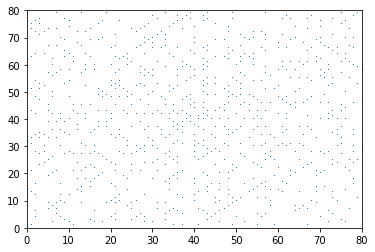

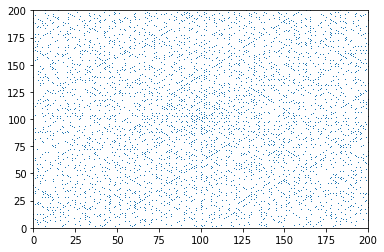

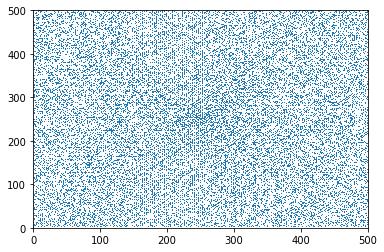

In [64]:
import matplotlib.pyplot as plt

def ulam(size):
    current_x = size//2
    current_y = size//2
    number = 1
    movement = 1
    x = []
    y = []
    plt.axis([0,size,0,size])
    while number < (size*size):
        for l in range(2):
            for j in range (2):            
                for i in range(movement):
                    if (j == 0) and (l == 0):
                        current_x += 1
                    elif (j == 1) and (l == 0):
                        current_y += 1
                    if (j == 0) and (l == 1):
                        current_x -= 1
                    elif (j == 1) and (l == 1):
                        current_y -= 1
                    number += 1
                    is_prime(number,x,y,current_x,current_y)

            movement += 1
    plt.plot(x,y,',')
    plt.show()

def is_prime(n,x,y,cx,cy):
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            return
    x.append(cx)
    y.append(cy)
ulam(80)
ulam(200)
ulam(500)

##### D) Vizualizace NSD
1. Napište program generující obrázek vizualizující největší společné dělitele

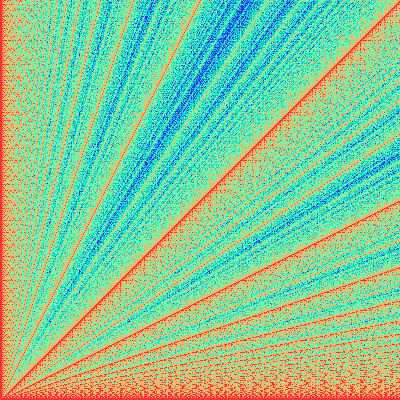

In [73]:
from PIL import Image
from IPython.display import display

def nsd(size):
    colors = [(51, 51, 255),(0, 204, 204),(102, 255, 178),(255, 178, 102),(255, 51, 51)]
    image = Image.new("RGB", (size, size))
    steps = 0
    for i in range(size):
        for j in range(size):
            if nsd2(i,size-j,steps) > 8:
                image.putpixel((i, j), colors[0])
            elif nsd2(i,size-j,steps) > 6:
                image.putpixel((i, j), colors[1])
            elif nsd2(i,size-j,steps) > 4:
                image.putpixel((i, j), colors[2])
            elif nsd2(i,size-j,steps) > 2:
                image.putpixel((i, j), colors[3])
            else:
                image.putpixel((i, j), colors[4])            
            steps = 0
    #image.show()
    image.save("NSD.bmp")
    display(image)


def nsd2(a,b,steps):
    if b == 0:
        return steps
    else:
        steps += 1
        return nsd2(b, a % b, steps)
    
nsd(400)